In [ ]:
#importing library
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

#Loading the dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

#model implementation
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

#storing the predected output here and visualizing the result
pred = model.predict(x_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.3457 - val_loss: 0.0907
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0880 - val_loss: 0.0812
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0806 - val_loss: 0.0772
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0775 - val_loss: 0.0751
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0754 - val_loss: 0.0736
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0739 - val_loss: 0.0727
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0730 - val_loss: 0.0716
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0722 - val_loss: 0.0711
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0717 - val_loss: 0.0706
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0712 - val_loss: 0.0702
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0707 - val_loss: 0.0698
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/st

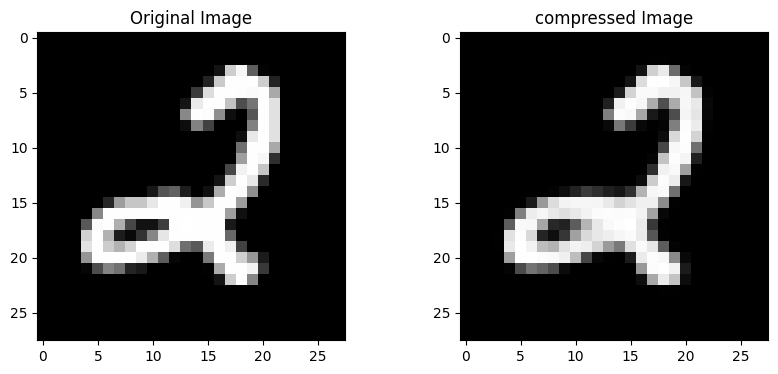

In [ ]:
#Visual Representation
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

# display compressed image
ax = plt.subplot(1, 2, 2)
plt.title("compressed Image")
plt.imshow(pred[index].reshape(28,28))
plt.gray()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Get original and predicted images
original = x_test[index].reshape(28, 28)
reconstructed = pred[index].reshape(28, 28)

# Compute Mean Squared Error
mse = mean_squared_error(original, reconstructed)
print(f"Mean Squared Error (MSE) between original and reconstructed image: {mse}")

Mean Squared Error (MSE) between original and reconstructed image: 0.001805284176953137
